<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/1_modelo_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   agrupar os filmes usando Cluesteriracao, KMeans
2.   Visualizar o centroids os grupos gerados e usar o SEABORN



o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
type(filmes_df)

pandas.core.frame.DataFrame

In [4]:
type(filmes_df.generos)

pandas.core.series.Series

In [5]:
filmes_df.generos.str

In [6]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [7]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [10]:
generos_escalados_ndarray.shape

(9742, 20)

In [11]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [12]:
print(dados_filmes_df['Adventure'].sum())
print(dados_filmes_df['Children'].sum())
print(dados_filmes_df['Fantasy'].sum())

1263
664
779


In [13]:
#filter
print(dados_filmes_df[dados_filmes_df.generos == 'Adventure|Children|Fantasy'])

      filme_id                                             titulo  ... War  Western
1            2                                     Jumanji (1995)  ...   0        0
53          60                 Indian in the Cupboard, The (1995)  ...   0        0
109        126                  NeverEnding Story III, The (1994)  ...   0        0
767       1009                    Escape to Witch Mountain (1975)  ...   0        0
1514      2043          Darby O'Gill and the Little People (1959)  ...   0        0
1556      2093                                Return to Oz (1985)  ...   0        0
1617      2161                      NeverEnding Story, The (1984)  ...   0        0
1618      2162  NeverEnding Story II: The Next Chapter, The (1...  ...   0        0
1799      2399                      Santa Claus: The Movie (1985)  ...   0        0
3574      4896  Harry Potter and the Sorcerer's Stone (a.k.a. ...  ...   0        0
6075     41566  Chronicles of Narnia: The Lion, the Witch and ...  ...   0  

In [14]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados_ndarray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
#imprimir os grupos, pegar os rotulos com labels
print('grupos {}'.format(modelo.labels_))

grupos [2 2 1 ... 1 2 1]


In [16]:
#o f é o format
print(f'grupos {modelo.labels_}')

grupos [2 2 1 ... 1 2 1]


In [17]:
print(generos_df.columns)
#centro de cada grupo
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.34443011 -0.27144974 -0.23524466 -0.26177995 -0.56224645
   0.92116332 -0.21328016  0.1061589  -0.16428849  0.29531782  0.43675484
  -0.07303529 -0.17640903  0.67695946 -0.31627997  0.07241632  1.43369349
  -0.12320804 -0.04115187]
 [ 0.03718158 -0.3196422  -0.29638571 -0.2200747  -0.18224451  0.24905694
  -0.27491431  0.13342489  0.10242285 -0.18142594 -0.08959578 -0.10824969
  -0.11251862  0.02284971 -0.2201504   0.18958695 -0.19496239 -0.48661325
   0.06061937  0.02889227]
 [-0.05917995  0.76435296  1.62770407  1.26101069  1.14841702 -0.13846894
  -0.31462227 -0.21094231 -0.58170462  0.993449   -0.09492563 -0.23904634
   0.57124651  0.18145075 -0.1575278  -0.27916393  0.6803341  -0.25077064
 

In [18]:
#transformar em dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.344430,-0.271450,-0.235245,-0.261780,-0.562246,0.921163,-0.213280,0.106159,-0.164288,0.295318,0.436755,-0.073035,-0.176409,0.676959,-0.316280,0.072416,1.433693,-0.123208,-0.041152
1,0.037182,-0.319642,-0.296386,-0.220075,-0.182245,0.249057,-0.274914,0.133425,0.102423,-0.181426,-0.089596,-0.108250,-0.112519,0.022850,-0.220150,0.189587,-0.194962,-0.486613,0.060619,0.028892
2,-0.059180,0.764353,1.627704,1.261011,1.148417,-0.138469,-0.314622,-0.210942,-0.581705,0.993449,-0.094926,-0.239046,0.571247,0.181451,-0.157528,-0.279164,0.680334,-0.250771,-0.054919,-0.053506


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa50dda90>,
      dtype=object)

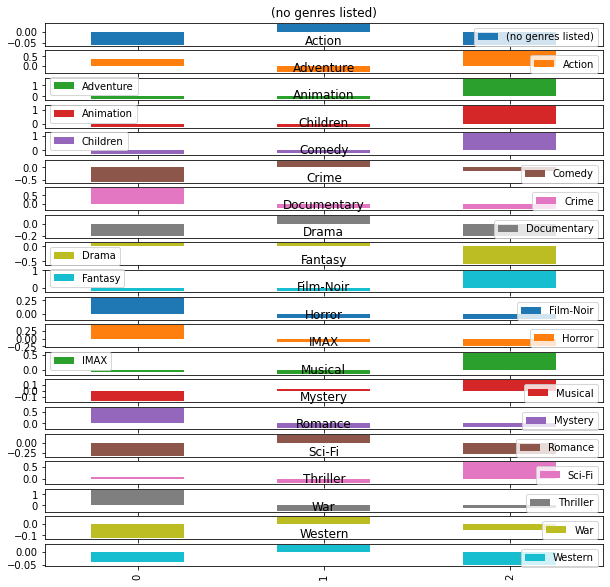

In [19]:
#um grafico pra cada grupo
grupos.plot.bar(subplots=True, figsize=(10,10), sharex=False)

In [20]:
#tranposicao de colunas
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,0.037182,-0.059180
Action,0.344430,-0.319642,0.764353
Adventure,-0.271450,-0.296386,1.627704
Animation,-0.235245,-0.220075,1.261011
Children,-0.261780,-0.182245,1.148417
Comedy,-0.562246,0.249057,-0.138469
Crime,0.921163,-0.274914,-0.314622
Documentary,-0.213280,0.133425,-0.210942
Drama,0.106159,0.102423,-0.581705
Fantasy,-0.164288,-0.181426,0.993449


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa4647710>,
      dtype=object)

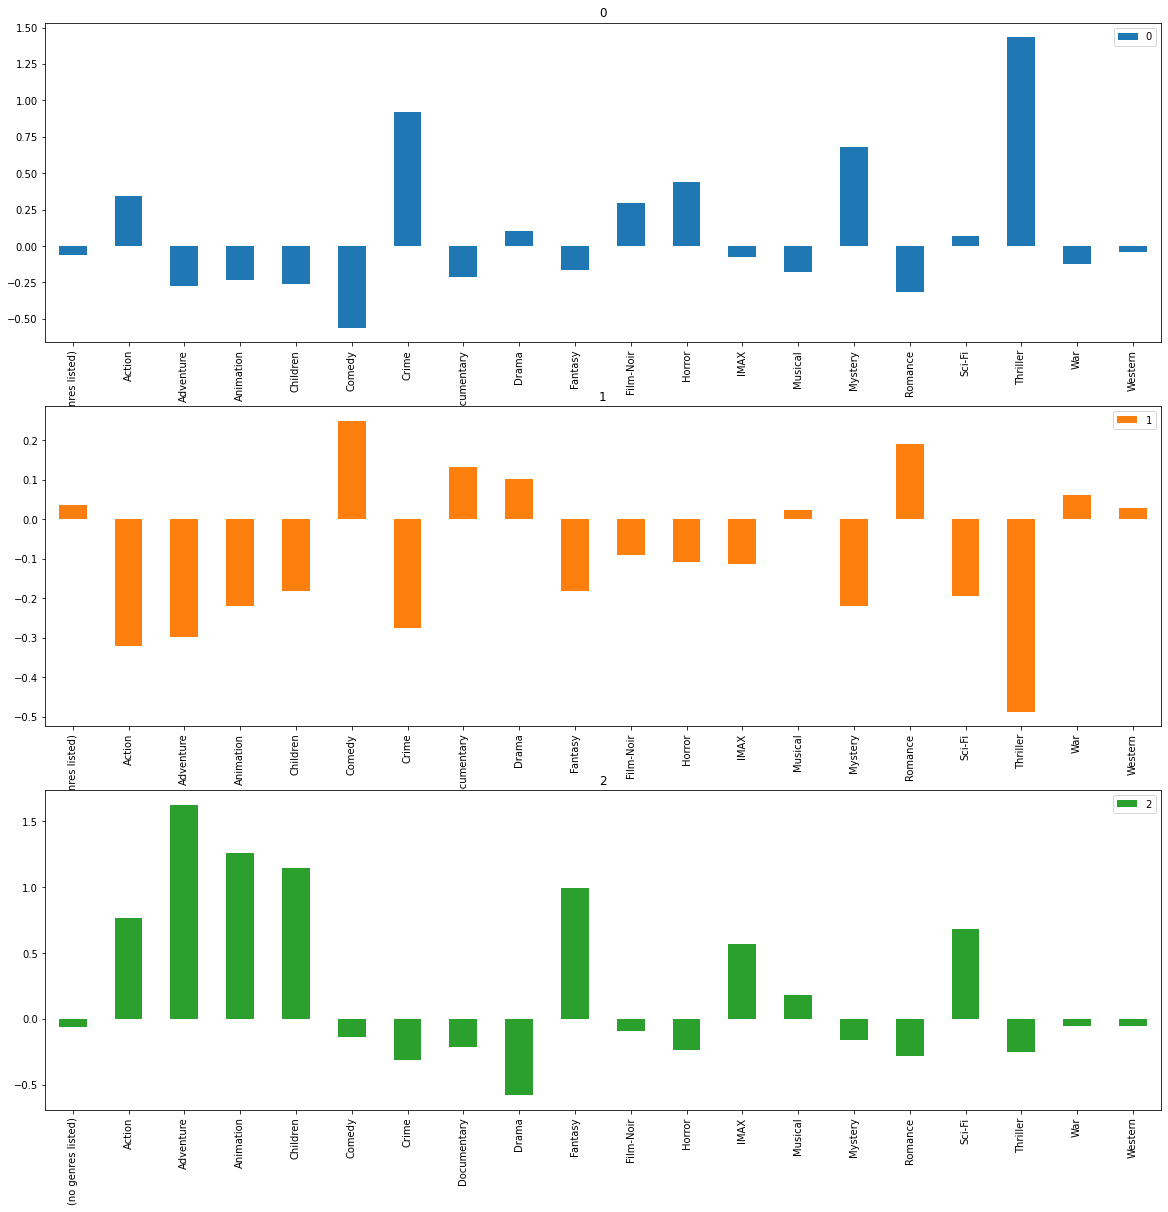

In [21]:
grupos.transpose().plot.bar(subplots=True, figsize=(20,20), sharex=False)

In [22]:
#fitrar o grupo
grupo = 0 
filtro = modelo.labels_ == grupo
dados_filmes_df[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7690,89582,Cold Fish (Tsumetai nettaigyo) (2010),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1468,1993,Child's Play 3 (1991),Comedy|Horror|Thriller,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1925,2553,Village of the Damned (1960),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
8889,134368,Spy (2015),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3482,4754,"Wicker Man, The (1973)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2426,3230,"Odessa File, The (1974)",Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1031,1343,Cape Fear (1991),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6543,54736,"Kingdom, The (2007)",Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3946,5556,FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot ...,Crime|Horror|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
6691,58287,Descent (2007),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#TSNE reduzir as dimensoes
from sklearn.manifold import TSNE

In [24]:
tsne = TSNE()
visulizar = tsne.fit_transform(generos_escalados_ndarray)
visulizar

array([[ 32.307823 ,  58.58172  ],
       [-13.818319 , -56.570587 ],
       [-19.975397 ,   6.652092 ],
       ...,
       [  8.990743 ,   2.0059605],
       [ 31.982107 ,  33.307556 ],
       [-14.28015  , -30.456411 ]], dtype=float32)

In [0]:
#SEABORN, !pip install seaborn para pegar nova versao 
import seaborn as sns

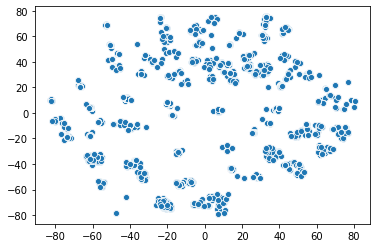

In [27]:
sns.scatterplot(x=visulizar[:,0], y=visulizar[:,1])

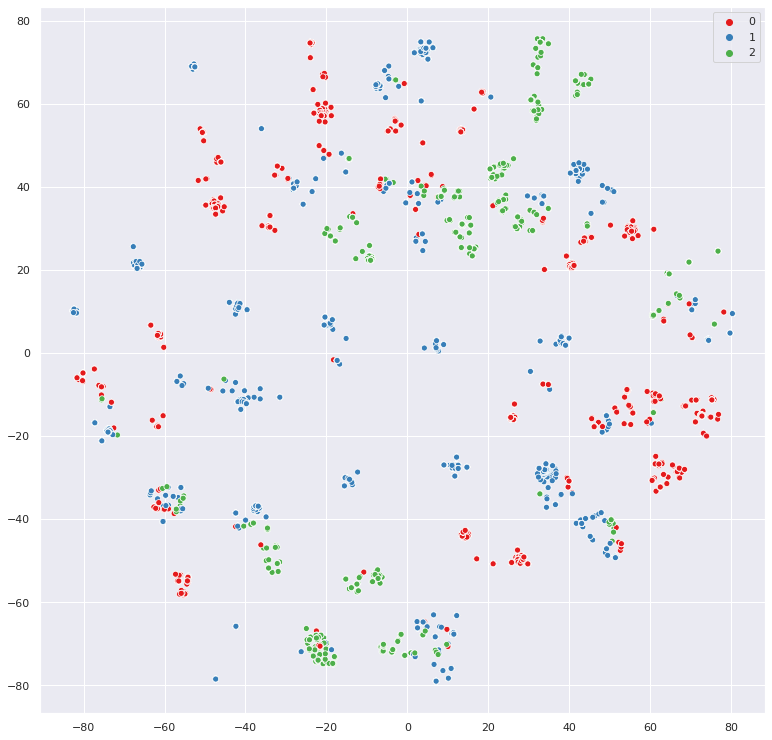

In [31]:
#inflcuir o hue para colocar as cores da classes q o kmean gero e o palette para corrigir o ton da cores
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visulizar[:,0], 
                y=visulizar[:,1], 
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

#temos um ponto de observação: alguma cores e estao junta com outra esperavamos que nao, e visemos os grupos
#porem lembrando que o tsne quando diminui as dimensoes ele perde informaçoes assim nao vamos ver os grupos